In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [4]:
# Load dataset
df = pd.read_csv("car_evaluation.csv")
print(df.head())
print(df.tail())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
     buying maint  doors persons lug_boot safety  class
1723    low   low  5more    more      med    med   good
1724    low   low  5more    more      med   high  vgood
1725    low   low  5more    more      big    low  unacc
1726    low   low  5more    more      big    med   good
1727    low   low  5more    more      big   high  vgood


In [5]:
# Create a copy and encode all categorical columns
df_encoded = df.copy()
le = LabelEncoder()
for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

print(df_encoded.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [6]:
# Set up features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

In [7]:
# Train/test split (optional for visualizing overfitting, here using all data for fit to match your code)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Decision Tree initialization and training
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

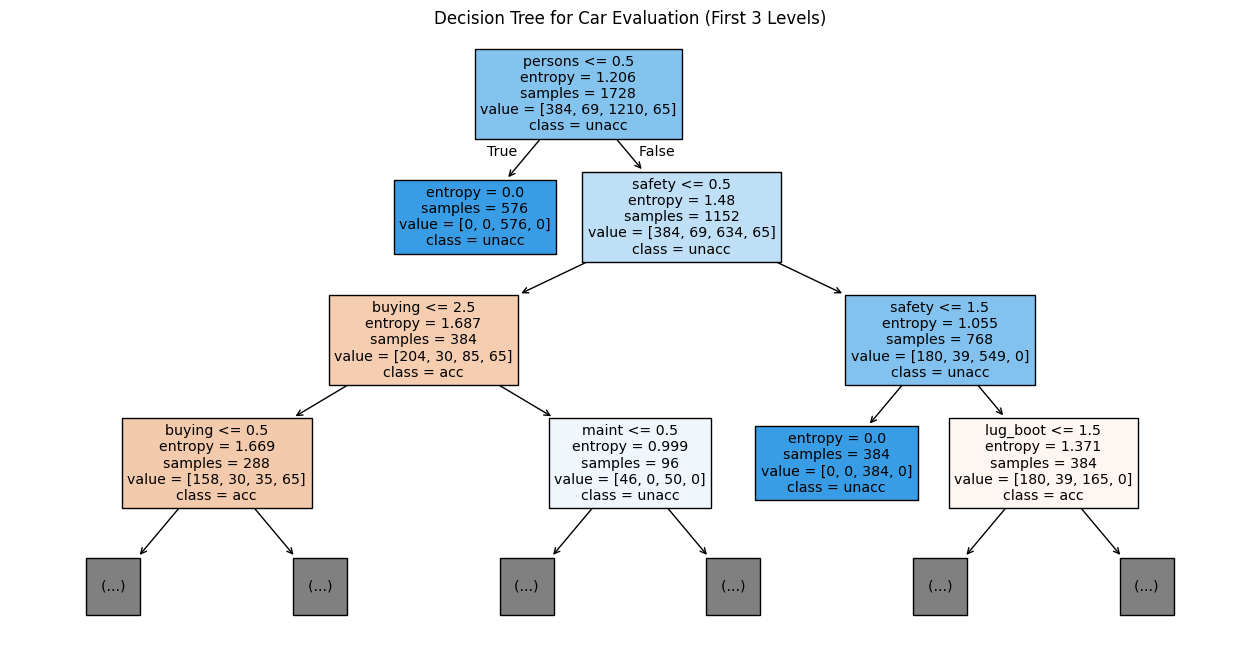

In [9]:
# Decision tree plot
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True, max_depth=3)
plt.title("Decision Tree for Car Evaluation (First 3 Levels)")
plt.show()


In [10]:
# Prediction and evaluation
y_pred = model.predict(X)
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Predictions: [2 2 2 ... 2 1 3]
Accuracy: 1.0
Confusion Matrix:
 [[ 384    0    0    0]
 [   0   69    0    0]
 [   0    0 1210    0]
 [   0    0    0   65]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00      1210
           3       1.00      1.00      1.00        65

    accuracy                           1.00      1728
   macro avg       1.00      1.00      1.00      1728
weighted avg       1.00      1.00      1.00      1728

